# Entropy: Measuring Uncertainty

Entropy is a measure of impurity or disorder in a classification dataset. The formula is:

$
H(p) = -\sum_{i=1}^{n} p_i \log_2(p_i)
$

Where $ p_i $ is the probability of class $ i $.

- Entropy is **0** when the class is pure (e.g., all one class).
- Entropy is **1** when the data is evenly split (max uncertainty for binary classification).


In [1]:
import numpy as np

def entropy(class_probs):
    class_probs = np.array(class_probs)
    non_zero_probs = class_probs[class_probs > 0]

    return -np.sum(non_zero_probs * np.log2(non_zero_probs))

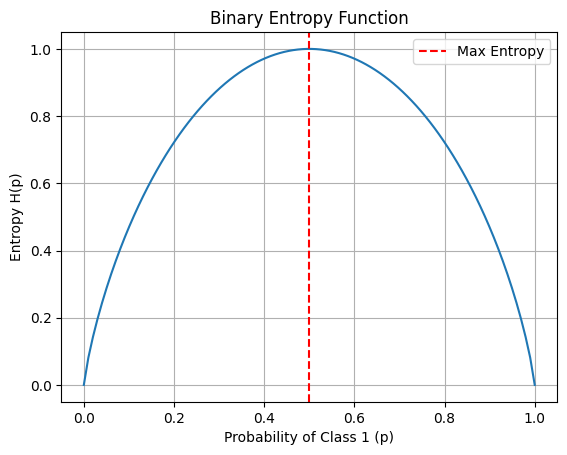

In [2]:
import matplotlib.pyplot as plt

p_values = np.linspace(0,1,100)
entropy_values = [entropy([p, 1-p]) for p in p_values]

plt.plot(p_values, entropy_values)
plt.title("Binary Entropy Function")
plt.xlabel("Probability of Class 1 (p)")
plt.ylabel("Entropy H(p)")
plt.grid(True)
plt.axvline(x=0.5, color='red', linestyle='--', label='Max Entropy')
plt.legend()
plt.show()

In [4]:
from collections import Counter

def dataset_entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    probs = [count / total for count in counts.values()]
    return entropy(probs)

# Try with a mixed dataset
labels1 = ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes']
labels2 = ['yes', 'yes', 'yes', 'yes', 'yes']

print("Entropy (mixed):", dataset_entropy(labels1))
print("Entropy (pure):", dataset_entropy(labels2))

Entropy (mixed): 1.0
Entropy (pure): -0.0


## Summary

- Entropy captures the uncertainty in the data.
- It is maximum when classes are equally likely.
- It is used in decision tree algorithms (e.g., ID3) to find the best attribute to split on (using Information Gain).

Next up: We'll apply this in building a simple decision tree!
